In [1]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Maroon 5 - Sugar (Official Music Video).csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50001
Records with emojis: 13932
                    user_id                    username  \
0  UCPQF5-ou39ugkE5eUcC7zBA  @astridemycamarenavela6050   
1  UChOAclsvK0iCIWtwCdjkuxQ            @OlivérLaska-u8l   
2  UCuigB1PH56g6MgirDKhRwAw                @adrian4k964   
3  UCq8qXIrpvcrgS3DsyZyKSQQ                    @loasoda   
4  UCIaDdEefFUelose2laaxahA           @MarkJamesRocillo   

                                             comment likes  replies  \
0                         20 de octubre domingo 2024     0      0.0   
1                                      2024 október?     0      0.0   
2                                     Grupo Frontera     0      0.0   
3  Wonder how and where those people are now. Hop...     0      0.0   
4                                       2024 anyone?     0      0.0   

                   date                                        video  \
0  2024-10-20T17:41:37Z  Maroon 5 - Sugar (Official Music Video).csv   
1  2024-10-20T

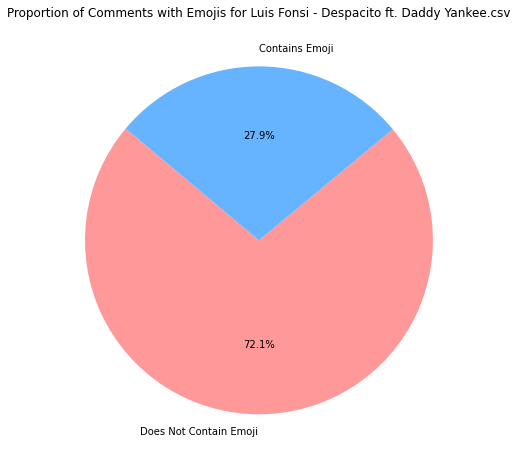

In [2]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [3]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-3-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
5,UCKn7E0E2_KJ6sjkWAOpnB5w,@Ahun-2004,ยังฟังอยู่2024 💕🫶🏻,0,0.0,2024-10-20T14:36:15Z,Maroon 5 - Sugar (Official Music Video).csv,True,2
8,UCmsBR7ld3-nZQ9oqwvBDtHg,@yandasneves7892,"Só lembro época de TVZ, essa era sucesso 😂❤",0,0.0,2024-10-20T13:41:19Z,Maroon 5 - Sugar (Official Music Video).csv,True,1
9,UCZWI8kcoJzRDXwFLsO_DJdA,@TheXtdesign,💯💯,0,0.0,2024-10-20T11:08:39Z,Maroon 5 - Sugar (Official Music Video).csv,True,1
11,UCG-c5ZIlN94_xbhr0HV662A,@고기아빠-b7k,한국인 등장이오!,0,0.0,2024-10-20T09:07:45Z,Maroon 5 - Sugar (Official Music Video).csv,True,2
16,UCHE9oQDsChRVJEljA5q21Ng,@CireTVersE,And please try to cure lupus soon than later🎉,0,0.0,2024-10-20T06:26:36Z,Maroon 5 - Sugar (Official Music Video).csv,True,1
...,...,...,...,...,...,...,...,...,...
49983,UCJdx9HycSLasnIVaYAp77mQ,@shai6992,Who’s here before 2021🙋🏼‍♀️,1,0.0,2020-12-31T11:43:41Z,Maroon 5 - Sugar (Official Music Video).csv,True,2
49986,UCGeyJORIB6phuRpbG6Zuicw,@KH-lz3ir,嫁さん腕ゴツいな,2,0.0,2020-12-31T11:17:38Z,Maroon 5 - Sugar (Official Music Video).csv,True,1
49991,UCGMAhIlgzRnPwEu4cu-WDJQ,@riskybased173,"3,3 B ?\nIn five years 🔥",1,0.0,2020-12-31T10:00:35Z,Maroon 5 - Sugar (Official Music Video).csv,True,1
49992,UCvJ3NyalQod9K-WvMPmnp_w,@najilsadeed7,Who all searched for this❤,1,0.0,2020-12-31T09:05:10Z,Maroon 5 - Sugar (Official Music Video).csv,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Maroon 5 - Sugar (Official Music Video).csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 6: Detected language: th
Row 6: Original: ยังฟังอยู่2024 💕🫶🏻, Translated: Still listening 2024 🫶 💕🏻
Row 6 saved.
Row 9: Detected language: pt
Row 9: Original: Só lembro época de TVZ, essa era sucesso 😂❤, Translated: I only remember the TVZ era, that was a hit 😂❤
Row 9 saved.
Row 10: Text contains only emojis or is empty: 💯💯
Row 10 saved.
Row 12: Error translating text: 한국인 등장이오!, Error: No features in text.
Row 12 saved.
Row 17: Detected language: en
Row 17: Original: And please try to cure lupus soon than later🎉, Translated: And please try to cure lupus soon than later 🎉
Row 17 saved.
Row 21: Detected language: en
Row 21: Original: Every day routine song ❤, Translated: Every day routine song ❤
Row 21 saved.
Row 30: Detected language: cy
Row 30: Original: I'm gonna cry 😢, Translated: I'm gonna cry 😢
Row 30 saved.
Row 32: Detected language: ro
Row 32: Original: Nice ❤ ?, Translated: Nice  ? ❤
Row 32 saved.
Row 33: Detected language: en
Row 33: Original: Action ❤, Translated: Action 

Row 145: Original: 🎉 Sugar - Octubre 2024, Translated: Sugar - October 2024 🎉
Row 145 saved.
Row 154: Text contains only emojis or is empty: 削个椰子皮 你却他妈给个🍐
Row 154 saved.
Row 155: Error translating text: ❤️‍🔥❤️❤️‍🔥, Error: No features in text.
Row 155 saved.
Row 160: Detected language: es
Row 160: Original: Precioso❤, Translated: Precious ❤
Row 160 saved.
Row 162: Detected language: en
Row 162: Original: It is Oct 2024..❤, Translated: It is Oct 2024.. ❤
Row 162 saved.
Row 164: Text contains only emojis or is empty: 伝説
Row 164 saved.
Row 165: Detected language: pt
Row 165: Original: Música maravilhosa ❤, Translated: Wonderful music ❤
Row 165 saved.
Row 166: Detected language: en
Row 166: Original: Anyone in oct. 15 ❤, Translated: Anyone in oct. 15 ❤
Row 166 saved.
Row 172: Detected language: en
Row 172: Original: The emotions in this songs is just so much😊, Translated: The emotions in this songs is just so much 😊
Row 172 saved.
Row 175: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 

Row 309: Original: Ei,eu sei que vc está aqui pra lembrar um momento bom de sua vida! ❤️, Translated: Hey, I know you're here to remember a good moment in your life! ❤️
Row 309 saved.
Row 310: Detected language: so
Row 310: Original: 🇧🇷amoooooo, Translated: I love it 🇧🇷
Row 310 saved.
Row 314: Detected language: es
Row 314: Original: No quieren grabar otro video así En Cartagena- colombia este 21 de diciembre que es mi boda ? 😂😂😂😂, Translated: Don't you want to record another video like this in Cartagena- Colombia this December 21st which is my wedding? 😂😂😂😂
Row 314 saved.
Row 316: Detected language: en
Row 316: Original: Anyone in October 2024?❤, Translated: Anyone in October 2024? ❤
Row 316 saved.
Row 321: Detected language: en
Row 321: Original: October 2024😂😂, Translated: October 2024 😂😂
Row 321 saved.
Row 324: Detected language: en
Row 324: Original: Anyone in October 2024？, Translated: Anyone in October 2024 ？
Row 324 saved.
Row 331: Detected language: en
Row 331: Original: 9 Oct

Row 530: Original: Lvoe❤❤, Translated: Leo ❤❤
Row 530 saved.
Row 534: Error translating text: 2024❤❤❤❤, Error: No features in text.
Row 534 saved.
Row 535: Detected language: en
Row 535: Original: Every time I was make me refresh ❤❤❤wish he can visit me ..nepali from Australia 😢😢, Translated: Every time I was make me refresh wish he can visit me ..nepali from Australia ❤❤❤😢😢
Row 535 saved.
Row 538: Detected language: en
Row 538: Original: Anyone in October 2024?? ❤😎🍷, Translated: Anyone in October 2024?? ❤😎🍷
Row 538 saved.
Row 548: Detected language: en
Row 548: Original: October 2024 anyone?😢, Translated: October 2024 anyone? 😢
Row 548 saved.
Row 549: Detected language: tr
Row 549: Original: Yeah ❤🎉, Translated: Yeah ❤🎉
Row 549 saved.
Row 551: Detected language: pt
Row 551: Original: Alguém em outubro 2024?❤🎉, Translated: Anyone in October 2024? ❤🎉
Row 551 saved.
Row 554: Detected language: en
Row 554: Original: The couples in this video be celebrating their 10th anniversary now. 😂❤, 

Row 661: Original: Aquí escuchandola en Cancúnnn !! 😜, Translated: Here listening to it in Cancun!! 😜
Row 661 saved.
Row 665: Detected language: pt
Row 665: Original: N o Come NT❤, Translated: N o Come NT ❤
Row 665 saved.
Row 666: Detected language: de
Row 666: Original: Fun❤, Translated: Fun ❤
Row 666 saved.
Row 667: Detected language: id
Row 667: Original: 🤸🤸🤸🤸ugar❤❤❤❤❤, Translated: 🤸🤸🤸🤸 fallow land ❤❤❤❤❤
Row 667 saved.
Row 668: Detected language: fr
Row 668: Original: Yes,me!!🇧🇷, Translated: Yes,me!! 🇧🇷
Row 668 saved.
Row 670: Detected language: en
Row 670: Original: Music❌ THE G.O.A.T ✅🔥❤️, Translated: Music THE G.O.A.T ❌✅🔥❤️
Row 670 saved.
Row 671: Detected language: tl
Row 671: Original: Pestaaaa nih...ikut dong..
❤😅❤😅❤😅❤😅❤, Translated: It's a party... come along.. ❤😅❤😅❤😅❤😅❤
Row 671 saved.
Row 672: Detected language: nl
Row 672: Original: When september ends😶, Translated: When september ends 😶
Row 672 saved.
Row 677: Text contains only emojis or is empty: ❤
Row 677 saved.
Row 691

Row 842: Original: I'm here🎉, Translated: I'm here 🎉
Row 842 saved.
Row 845: Detected language: en
Row 845: Original: The song: 👍
The video: 💀, Translated: The song: 
The video: 👍💀
Row 845 saved.
Row 847: Text contains only emojis or is empty: 😂😂😂
Row 847 saved.
Row 851: Detected language: en
Row 851: Original: The best blow out maroon did ❤, Translated: The best blow out maroon did ❤
Row 851 saved.
Row 859: Detected language: en
Row 859: Original: ❤❤❤❤ oh my gpsh my happy song 4 ever !! Sept 2024 🎉🎉, Translated: oh my gpsh my happy song 4 ever !! Sept 2024 ❤❤❤❤🎉🎉
Row 859 saved.
Row 860: Detected language: en
Row 860: Original: I love this song and the video,brilliant idea😀❤, Translated: I love this song and the video,brilliant idea 😀❤
Row 860 saved.
Row 861: Detected language: en
Row 861: Original: Listening to Maroon 5 songs to prep for their Manila concert next year!!!! 🎵🤟, Translated: Listening to Maroon 5 songs to prep for their Manila concert next year!!!! 🤟 🎵
Row 861 saved.
Row 

Row 1059: Original: September 24 ❤, Translated: September 24 ❤
Row 1059 saved.
Row 1064: Detected language: en
Row 1064: Original: This song is so amazing!!!❤, Translated: This song is so amazing!!! ❤
Row 1064 saved.
Row 1066: Text contains only emojis or is empty: 東京ドーム楽しみにしてます
Row 1066 saved.
Row 1067: Detected language: hr
Row 1067: Original: O my god i like ❤❤❤❤, Translated: O my god i like ❤❤❤❤
Row 1067 saved.
Row 1071: Detected language: en
Row 1071: Original: Good song🎉, Translated: Good song 🎉
Row 1071 saved.
Row 1072: Detected language: en
Row 1072: Original: Cant believe this is 9 years old song now,  wow wat a Great music memories time flies 😮❤, Translated: Cant believe this is 9 years old song now,  wow wat a Great music memories time flies 😮❤
Row 1072 saved.
Row 1077: Detected language: en
Row 1077: Original: Love Maroon 5 till now🎧, Translated: Love Maroon 5 till now 🎧
Row 1077 saved.
Row 1082: Detected language: en
Row 1082: Original: Sept 2024 here! When my sons get mar

Row 1221: Original: September 2024! 🎉, Translated: September 2024! 🎉
Row 1221 saved.
Row 1223: Detected language: en
Row 1223: Original: Hello from 2026! ♡
You’re an absolute legend for listening to this song.

Nostalgia :D


Daily reminder:
Don’t let anybody get to you. Be you :3, Translated: Hello from 2026! 
You’re an absolute legend for listening to this song.

Nostalgia :D


Daily reminder:
Don’t let anybody get to you. Be you :3 ♡
Row 1223 saved.
Row 1224: Error translating text: 魔力紅🥰  2024打卡, Error: No features in text.
Row 1224 saved.
Row 1226: Text contains only emojis or is empty: 🎉
Row 1226 saved.
Row 1230: Detected language: en
Row 1230: Original: Anyome on september 2024 🎉, Translated: Anyome on september 2024 🎉
Row 1230 saved.
Row 1231: Detected language: de
Row 1231: Original: September 2024❤, Translated: September 2024 ❤
Row 1231 saved.
Row 1232: Detected language: sk
Row 1232: Original: Tu vidíme,že niekto zobral rozum do hrsti a vymyslel niečo bombastické 👍👍👍💥🌟, Trans

Row 1335: Original: Anyone in 2026😊😊😊, Translated: Anyone in 2026 😊😊😊
Row 1335 saved.
Row 1336: Text contains only emojis or is empty: 👍👍👍❤❤❤
Row 1336 saved.
Row 1340: Detected language: es
Row 1340: Original: Quero eles no meu casamento 🎉🎉🎉, Translated: I want them at my wedding 🎉🎉🎉
Row 1340 saved.
Row 1343: Text contains only emojis or is empty: ❤❤❤
Row 1343 saved.
Row 1344: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉
Row 1344 saved.
Row 1345: Detected language: ru
Row 1345: Original: Я😊., Translated: I. 😊
Row 1345 saved.
Row 1346: Detected language: en
Row 1346: Original: Anyone watching this song now✨, Translated: Anyone watching this song now ✨
Row 1346 saved.
Row 1348: Detected language: so
Row 1348: Original: 03/09/2024 9:07 am❤, Translated: 03/09/2024 9:07 am ❤
Row 1348 saved.
Row 1350: Detected language: en
Row 1350: Original: who's Listening in 2024 ??🎧🎧🎧, Translated: who's Listening in 2024 ?? 🎧🎧🎧
Row 1350 saved.
Row 1352: Detected language: en
Row 1352: Original: Best vi

Row 1498: Original: Bravi tutti, bella sorpresa agli sposi, ragazzi siete grandi 🙂🙂🙂😉😉😉❤, Translated: Well done everyone, nice surprise for the newlyweds, you guys are great 🙂🙂🙂😉😉😉❤
Row 1498 saved.
Row 1499: Detected language: hu
Row 1499: Original: Még ennyi év után is odabasz 😃😃, Translated: Even after all these years, you're still there 😃😃
Row 1499 saved.
Row 1501: Detected language: en
Row 1501: Original: ❤ love this song, Translated: love this song ❤
Row 1501 saved.
Row 1506: Detected language: en
Row 1506: Original: The Best Video Ever 🎉🎉🎉🎉, Translated: The Best Video Ever 🎉🎉🎉🎉
Row 1506 saved.
Row 1507: Detected language: es
Row 1507: Original: Yo siempre ❤❤❤ agosto de madrugad😊, Translated: I always August early in the morning ❤❤❤😊
Row 1507 saved.
Row 1509: Detected language: tl
Row 1509: Original: Anyone in Today? ❤, Translated: Anyone in Today? ❤
Row 1509 saved.
Row 1511: Detected language: tl
Row 1511: Original: 2050 Anyone??👇, Translated: 2050 Anyone?? 👇
Row 1511 saved.
Row 

Row 1667: Original: Homepro Phuket 😅😅😅😅, Translated: Homepro Phuket 😅😅😅😅
Row 1667 saved.
Row 1669: Detected language: en
Row 1669: Original: Love this makes me feel so happy ❤❤❤❤, Translated: Love this makes me feel so happy ❤❤❤❤
Row 1669 saved.
Row 1671: Detected language: en
Row 1671: Original: Somewhere still surround could this compatible along this rythim you know what ' something upset would been they can't explain a lot 😂😂, Translated: Somewhere still surround could this compatible along this rythim you know what ' something upset would been they can't explain a lot 😂😂
Row 1671 saved.
Row 1674: Detected language: es
Row 1674: Original: Ronaldo 😂😂😂🎉🎉🎉, Translated: Ronaldo 😂😂😂🎉🎉🎉
Row 1674 saved.
Row 1675: Detected language: et
Row 1675: Original: August 2024😍, Translated: August 2024 😍
Row 1675 saved.
Row 1677: Detected language: en
Row 1677: Original: Thaz cool 😎, Translated: Thaz cool 😎
Row 1677 saved.
Row 1678: Detected language: en
Row 1678: Original: Just Dance is the reason 

Row 1799: Original: A cara do Noivo: Como eu vou pagar isso 😦, Translated: The Groom's Face: How am I going to pay for this? 😦
Row 1799 saved.
Row 1802: Text contains only emojis or is empty: すみません途中で切れました😢
Row 1802 saved.
Row 1804: Detected language: fr
Row 1804: Original: Magnifect!❤❤❤, Translated: Magnifect! ❤❤❤
Row 1804 saved.
Row 1806: Text contains only emojis or is empty: 사랑해요
Row 1806 saved.
Row 1807: Detected language: en
Row 1807: Original: who is still listening? ❤, Translated: who is still listening? ❤
Row 1807 saved.
Row 1809: Detected language: en
Row 1809: Original: I wish a guy would sing this to me ❤, Translated: I wish a guy would sing this to me ❤
Row 1809 saved.
Row 1812: Error translating text: 🇧🇷 2024 😁, Error: No features in text.
Row 1812 saved.
Row 1821: Detected language: en
Row 1821: Original: It's a proposal song by a boy to his favourite girl 💕🤪(I love you pusku🥺), Translated: It's a proposal song by a boy to his favourite girl 🤪(I love you pusku🥺) 💕
Row 18

Row 1972: Original: Still vibing 2024 🇳🇵, Translated: Still vibing 2024 🇳🇵
Row 1972 saved.
Row 1973: Detected language: en
Row 1973: Original: Thinking about the people who missed these weddings despite of receiving invitations 😂😂. BTW, Love from India., Translated: Thinking about the people who missed these weddings despite of receiving invitations . BTW, Love from India. 😂😂
Row 1973 saved.
Row 1975: Text contains only emojis or is empty: 生姜～安い～地下でとれたのに
Row 1975 saved.
Row 1980: Error translating text: ❤️‍🔥, Error: No features in text.
Row 1980 saved.
Row 1988: Detected language: et
Row 1988: Original: Easeilase❤❤❤❤❤❤❤❤❤❤🎉😊, Translated: Senior citizen ❤❤❤❤❤❤❤❤❤❤🎉😊
Row 1988 saved.
Row 1989: Detected language: en
Row 1989: Original: Great Songs😂❤, Translated: Great Songs 😂❤
Row 1989 saved.
Row 1990: Detected language: en
Row 1990: Original: Great Song😂❤, Translated: Great Song 😂❤
Row 1990 saved.
Row 1991: Detected language: th
Row 1991: Original: ฉันมาจากประเทศไทย🇹🇭..ฉันรักเพลงนี้..และช

Row 2108: Original: Anyone in 2026?

👇, Translated: Anyone in 2026? 👇
Row 2108 saved.
Row 2112: Detected language: en
Row 2112: Original: I thought it was sugar, you’re sweet not yes please 😭, Translated: I thought it was sugar, you’re sweet not yes please 😭
Row 2112 saved.
Row 2124: Detected language: pt
Row 2124: Original: Boa tarde! Gente eu estou sendo ameaçado de morte por várias pessoas e por motivos que nem são verdades. não tô aguentando mas passar por esse tormento😭😭😭😭😭😭e por isso imploro muito pela oração de vcs gente😭😭😭😭😭pfv orem por me eu suplico eu imploro😭😭😭😭😭😭😭😭😭😭😭Diego💔💔💔💔. Falo do Brasil🇧🇷, Translated: Good afternoon! People, I am being threatened with death by several people and for reasons that are not even true. I can't bear to go through this torment anymore and that's why I really beg for your prayers, people, please pray for me, I beg you, Diego. I'm speaking from Brazil. 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭💔💔💔💔🇧🇷
Row 2124 saved.
Row 2127: Text contains only emojis or is empty

Row 2309: Original: AMOO ESSA MÚSICA ❤, Translated: I LOVE THIS SONG ❤
Row 2309 saved.
Row 2311: Detected language: en
Row 2311: Original: I've been listening to this song ever since it came out and somehow only now in 2024 am I watching the video, this is one of the most wholesome things I've ever seen 😭, Translated: I've been listening to this song ever since it came out and somehow only now in 2024 am I watching the video, this is one of the most wholesome things I've ever seen 😭
Row 2311 saved.
Row 2314: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 2314 saved.
Row 2316: Text contains only emojis or is empty: ❤
Row 2316 saved.
Row 2317: Detected language: en
Row 2317: Original: CEO of MUSIC👑👑👑👑👑, Translated: CEO of MUSIC 👑👑👑👑👑
Row 2317 saved.
Row 2318: Text contains only emojis or is empty: なんでウォーキングデッドのリックとジーザスがいる？
Row 2318 saved.
Row 2320: Detected language: en
Row 2320: Original: This song was made the day and year I was born😭😢, Translated: This song was made the

Row 2380: Original: Wss❤, Translated: Wss ❤
Row 2380 saved.
Row 2382: Detected language: so
Row 2382: Original: heeeey 2024❤❤❤❤❤🎉, Translated: heeeey 2024 ❤❤❤❤❤🎉
Row 2382 saved.
Row 2383: Detected language: en
Row 2383: Original: Listening to this year 🎉❤, Translated: Listening to this year 🎉❤
Row 2383 saved.
Row 2384: Detected language: en
Row 2384: Original: Hey, this is beautiful ❤ Check out my latest cover song too. https://youtu.be/UaVZBNPUpSc?si=90u17XHt-LK2-K9F, Translated: Hey, this is beautiful  Check out my latest cover song too. https://youtu.be/UaVZBNPUpSc?si=90u17XHt-LK2-K9F ❤
Row 2384 saved.
Row 2386: Detected language: pl
Row 2386: Original: Wow ❤❤❤❤❤❤, Translated: Wow ❤❤❤❤❤❤
Row 2386 saved.
Row 2387: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 2387 saved.
Row 2388: Detected language: tl
Row 2388: Original: Aug 2024 ✌🏼✌🏼 😅, Translated: Aug 2024 ✌🏼✌🏼😅
Row 2388 saved.
Row 2390: Text contains only emojis or is empty: 生姜ー安いー地下で取れたのにぃー
Row 2390 saved.
Row 2393: Text con

Row 2535: Original: BRO 4B VEIWS🎉, Translated: BRO 4B VEIWS 🎉
Row 2535 saved.
Row 2536: Detected language: en
Row 2536: Original: 2024🎉🎉🎉 Who??😅😅, Translated: 2024 Who?? 🎉🎉🎉😅😅
Row 2536 saved.
Row 2537: Text contains only emojis or is empty: ❤❤❤❤
Row 2537 saved.
Row 2540: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 2540 saved.
Row 2541: Text contains only emojis or is empty: 😅❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 2541 saved.
Row 2542: Detected language: en
Row 2542: Original: Who is listening 2050🎉😅, Translated: Who is listening 2050 🎉😅
Row 2542 saved.
Row 2545: Text contains only emojis or is empty: ❤
Row 2545 saved.
Row 2548: Text contains only emojis or is empty: 😢😢
Row 2548 saved.
Row 2549: Detected language: nl
Row 2549: Original: Free Palestine... ❤❤❤ Hope and Deep, Translated: Free Palestine...  Hope and Deep ❤❤❤
Row 2549 saved.
Row 2552: Detected language: en
Row 2552: Original: Reaction on Maroon 5
💤, Tr

Row 2618: Original: Cazzo che ricordi, bei tempi, mi viene da piangere, nient altro...😢, Translated: Damn what memories, good times, it makes me want to cry, nothing else... 😢
Row 2618 saved.
Row 2622: Detected language: en
Row 2622: Original: Prayerfully all of these couples are still married in 2024 ❤, Translated: Prayerfully all of these couples are still married in 2024 ❤
Row 2622 saved.
Row 2627: Detected language: fi
Row 2627: Error translating text: Yes july 🎉 2024, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2627 saved.
Row 2631: Detected language: en
Row 2631: Original: Everything is perfect in this song and video! 
Hey from 19 JULY 2024 ❤, Translated: Everything is perfect in this song and video! 
Hey from 19 JULY 2024 ❤
Row 2631 saved.
Row 2632: Detected language: en
Row 2632: Orig

Row 2763: Error translating text: 😅yo julllyy 2024, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2763 saved.
Row 2764: Text contains only emojis or is empty: ❤❤❤❤
Row 2764 saved.
Row 2766: Detected language: en
Row 2766: Original: Those couples are soooo damn lucky ❤❤❤🎉, Translated: Those couples are soooo damn lucky ❤❤❤🎉
Row 2766 saved.
Row 2769: Detected language: en
Row 2769: Original: Happy 10th Anniversary to all these beautiful couples💝💝, Translated: Happy 10th Anniversary to all these beautiful couples 💝💝
Row 2769 saved.
Row 2771: Detected language: en
Row 2771: Original: Man This Song Was Uploaded After My Birthday Damn I Was Blessed Maroon 5🎉, Translated: Man This Song Was Uploaded After My Birthday Damn I Was Blessed Maroon 5 🎉
Row 2771 saved.
Row 2773: Detected language: de
Row 2773

Row 2855: Error translating text: 最高の曲とMV！！！, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2855 saved.
Row 2857: Detected language: en
Row 2857: Original: What's nice about songs and videos like this is that irrespective of how much an a$$hole you maybe in real life you can't help smiling once this starts up 😂❤, Translated: What's nice about songs and videos like this is that irrespective of how much an a$$hole you maybe in real life you can't help smiling once this starts up 😂❤
Row 2857 saved.
Row 2858: Detected language: en
Row 2858: Original: 2024 who is here with me? 😻😻You who read my comment right now may God bring success in your life and bless your children from generation to generation, Translated: 2024 who is here with me? You who read my comment right now may God bring success in you

Row 2963: Error translating text: Esto si es música 😎, aquí los del 2024 🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 2963 saved.
Row 2965: Detected language: en
Row 2965: Original: The vibes in this video are UNMATCHED 🔥🔥🔥, Translated: The vibes in this video are UNMATCHED 🔥🔥🔥
Row 2965 saved.
Row 2968: Detected language: en
Row 2968: Original: All these years later, Uncle is still wondering,  'Who are these guys'. 😂, Translated: All these years later, Uncle is still wondering,  'Who are these guys'. 😂
Row 2968 saved.
Row 2971: Detected language: en
Row 2971: Original: Of course the groom takes all the credit so it was all completely his idea🎉😂, Translated: Of course the groom takes all the credit so it was all completely his idea 🎉😂
Row 2971 saved.
Row 2973: Detected language: en
Row 2973:

Row 3073: Error translating text: Yes hehehehe 🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3073 saved.
Row 3074: Detected language: fi
Row 3074: Error translating text: 1 july 2024🎉🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3074 saved.
Row 3076: Text contains only emojis or is empty: まじで、ショウガ、安い、地下でとれたのに～ってサビで聞こえるわ
Row 3076 saved.
Row 3077: Detected language: en
Row 3077: Original: Wow superfrumos ❤))) 😊, Translated: Wow superfrumos ))) ❤😊
Row 3077 saved.
Row 3079: Detected language: sw
Row 3079: Error translating text: Kaka 🎶, Error: Server Error: You made too many requests to the server.Acc

Row 3190: Error translating text: I love it ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3190 saved.
Row 3192: Detected language: en
Row 3192: Original: The best music video ever to reality ❤, Translated: The best music video ever to reality ❤
Row 3192 saved.
Row 3197: Detected language: fr
Row 3197: Error translating text: Anyone June 2024 😊❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3197 saved.
Row 3198: Detected language: hu
Row 3198: Error translating text: Temazo ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per sec

Row 3232: Error translating text: Шикарная песня❤ любовь, которую группа подарила молодоженам в виде выступления без оплаты от всего сердца - это нашло отклики в сердцах миллионов слушателей по всему миру 👏👏👏 более 4 миллиардов прослушиваний это 🔥🔥🔥, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3232 saved.
Row 3233: Detected language: en
Row 3233: Original: Ready 🎧, Translated: Ready 🎧
Row 3233 saved.
Row 3234: Detected language: pt
Row 3234: Error translating text: To all beings send you pure love.❤❤❤   om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translat